# Python Assignment 2

⏱⏱⏱**Due: 10/15/2023 11:59 PM** ⏱⏱⏱

Please submit your notebook files and upload them to your Git repository. Don't forget to include a link to your Git repository when submitting this file on Brightspace.

Collaboration is permitted and encouraged; however, it's essential to independently produce and submit your own work. If you collaborate with others, please ensure that you provide their names in the designated section.

Collaborators:_____

(150 points total)

I have provided some guidance in comments to help you through the steps, but feel free to approach this in a different way if you prefer. **Feel free to disregard my comments if you have an alternative approach in mind.**

## 1. Good presentation of your code and outputs; submitting your files to Github (10 pts)

Ensure thorough and clear comments within your code to explain its functionality.

Enhance your plots by adding titles, legends, and axis labels where appropriate to provide clarity.

If necessary, employ LaTex notation to present mathematical explanations within the notebook.

Divide your code into multiple blocks or cells in Jupyter Notebook and provide descriptive explanations for each block to improve readability.

As part of your submission, include the notebook files and upload them to your Git repository. Additionally, remember to provide a link to your Git repository when submitting the files on Brightspace.

Please adhere to the constraint of using only the `numpy`, `scipy`, and `matplotlib` libraries for this assignment, as it is feasible to complete the task without introducing additional libraries or packages.



## 2. Implementing Gradient Descent Algorithm (60 pts)

Given a function $f(x) = \sqrt{x^2+5}$, $x\in \mathbf{R}$.

Fact: This function is L-smooth.
0. Find the gradient of this function and the minimum value of this function analytically.


1. Plot this function over the interval $[-5, 5]$.
2. Perform the Gradient Descent algorithm to find the minimum value of $f$ for $50$ iterations ($T$) with a step size of $1$ ($\alpha$). Use the last digit of your SB ID divided by 5 and then plus 1 as the initial guess (for example, if your ID ends with 9, your initial guess $x_0$ will be $9\div5 + 1= 2.8$).
3. Record the values of $x_k$ at the $k$-th iteration during GD and report $x_T$.
4. Plot the value of $f(x_k)$ v.s. the iteration number $k$.
5. For each of the step sizes 5, 3, 1, and 0.5, perform gradient descent and record the values of $x_k$ in each step $k$. Plot $f(x_{k-1}) - f(x_{k})$ v.s. $k$ for each step size. Your graphs should all be included in a single plot. Examine if $f(x_{k-1}) - f(x_{k})$ (which means that $f(x_k)$ is always decreasing) is alway positive for all $k$.

Here are some sample output graphs. Yours do not have to look exactly like mine, it is just for your reference.
![o1](https://raw.githubusercontent.com/wenhangao21/AMS595-Teaching/main/o1.png)
![o2](https://raw.githubusercontent.com/wenhangao21/AMS595-Teaching/main/o2.png)
![o3](https://raw.githubusercontent.com/wenhangao21/AMS595-Teaching/main/o3.png)


The first part of my code simply creates a function, f(x), thats used to compute sqrt(x^2+5). This is then plotted 

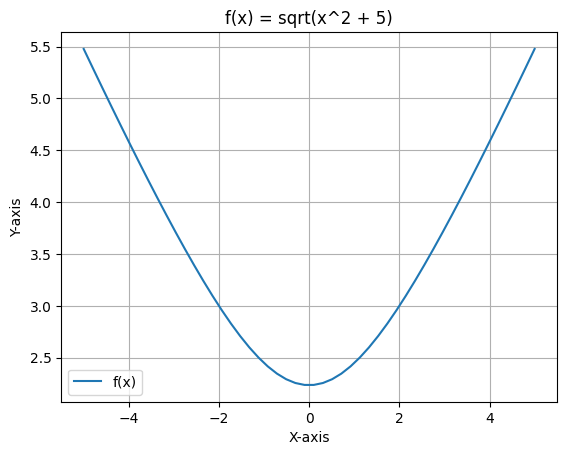

In [50]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function f(x) = sqrt(x^2+5)
def f(x):
    return np.sqrt( x**2 + 5)

# Plot the function f(x), np.linspace might be helpful.
x1 = np.linspace(-5, 5, endpoint=True)
y1 = f(x1)

plt.plot(x1, y1, label='f(x)') #plotting x vs y 
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('f(x) = sqrt(x^2 + 5)')
plt.legend() # Adding Legends
plt.grid(True) # Adding Grids
plt.show()


The second part of my code then creates a function df(x) that computes the derivative of the function. The derivative was taken analytically versus being computed. Then the actual gradient descent function is definded, whihc takes in inital value, step size, and iterations. It works by iterating num_iterations times, adding to a list of values each time with the value equal to the gradient descent function. The function takes the pervious list value and substracts the step size times the derivatve at that point. This is then appended. 

The final part of this cell tests the gradient descent function and plots its result.

x_T =  5.313021092124361e-13


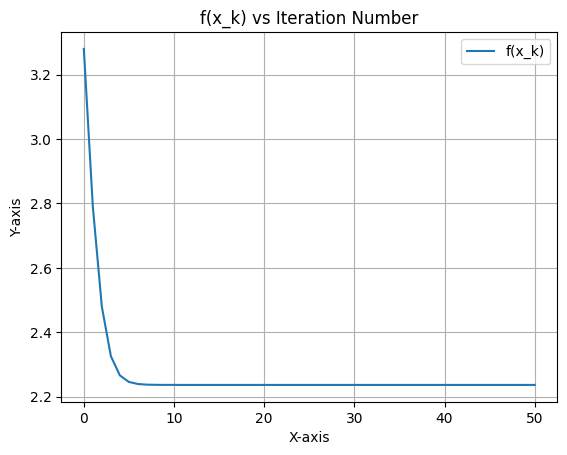

In [51]:
# Define the derivative of the function f(x), for gradient descent
def df(x):
    return x / np.sqrt( x**2 + 5 )

# write a function to run the Gradient Descent Algorithm, take input arguments x_0, step_size, and num_iterations; return a list/array of x_k values.
def grad_des(x_0, step_size, num_iterations):
    x_k = [x_0]
    for i in range(1, num_iterations + 1):
        x_k.append(x_k[i-1] - step_size * df(x_k[i-1])) #gradient descent function, dependant on last value of x
    return np.array(x_k)    

# set up/assign initial values
T = 50 #number of iterations
alpha = 1 #step size
x_in = 7 / 5 + 1 #inital value

# Run gradient descent by calling the function
x_k = grad_des(x_in, alpha, T)

# report x_T by printing out the value
print('x_T = ', x_k[T])

# Plot the f(x_k) values vs. iteration number
y2 = f(x_k)
iterations = range(0, T+1)

plt.plot(iterations, y2, label='f(x_k)') #plot y2 vs iterations, shows how we approach min value
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('f(x_k) vs Iteration Number')
plt.legend() # Adding Legends
plt.grid(True) # Adding Grids
plt.show()


This cell tests the algorithm for different step sizes. This is done in the two for loops. In the first for loop the desired step sizes are iterated through performing the gradient descent function for each one and storing the values per iteration. In the second for loop a list is created thats equal to f(k-1) - f(k) for each step size. The significance of this plot is that its always positive, indicating the algorithm is always descending, and it approaches 0, indicating it's reaching a minimum. 

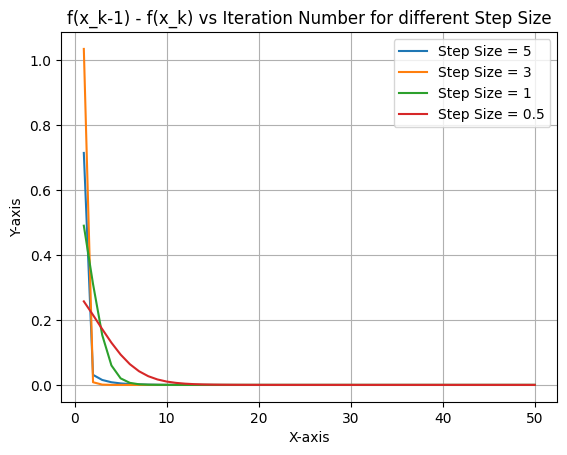

In [54]:
# create a list containing step sizes
step_size = [5, 3, 1, 0.5]

# initialize a list to store the results from different step sizes
x_step_size = []
f_delta = [[] for _ in range(0, len(step_size))]

# loop through the step sizes and perform GD and record results
for i in range(0, len(step_size)):
    x_step_size.append(grad_des(x_in, step_size[i], T))

#loops through each step size, and then each index in the list and calculates f(xk-1)-f(xk)
for i in range(0, len(step_size)):
    for j in range(0, T):
        f_delta[i].append( f(x_step_size[i][j]) - f(x_step_size[i][j+1]) )

# plot multiple curves in a single graph
iterations2 = range(1, T+1)
plt.plot(iterations2, f_delta[0], label='Step Size = 5') 
plt.plot(iterations2, f_delta[1], label='Step Size = 3')
plt.plot(iterations2, f_delta[2], label='Step Size = 1')
plt.plot(iterations2, f_delta[3], label='Step Size = 0.5')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('f(x_k-1) - f(x_k) vs Iteration Number for different Step Size')
plt.legend() # Adding Legends
plt.grid(True) # Adding Grids
plt.show()


## 3. Linear Regression with Numpy and Graphing with Matplotlib (30 pts)

In class, we implemented a linear regression model with one-dimensional features ( $x$-values). However, below, you will find the code for generating synthetic data where the features ( $x$-values) are now two-dimensional.

**Change the random seed to be the last two digits of your student ID. For example, if your ID is 123456987, change the random seed to be 87.**

The next step involves performing linear regression on this newly generated data. We will employ the normal equation, a topic covered in class, to determine the coefficients and intercept (weights and bias).

**Report the parameter values and plot the generated data and the regression plane (in 1D, we have a line, but in 2D, we have a plane).** `numpy.linspace`, `numpy.meshgrid`, and [Surface Plot](https://matplotlib.org/stable/gallery/mplot3d/surface3d.html) methods might be helpful in plotting the plane. You don't have to use them, it is just my suggestions.

Here are some sample output graphs. Yours do not have to look exactly like mine, it is just for your reference.
![o1](https://raw.githubusercontent.com/wenhangao21/AMS595-Teaching/main/o4.png)



The below code performs a multiple regression of the 3 dimensional data to a 2D plane. This is done by calculating the weights and bias terms as:
$$\Theta=\left(X^T X\right)^{-1} X^T Y$$
Where X is a matrix of the dataset and a column of 1s to store bias terms. This is then plotted in 3D using a scatter plot for the data and a meshgrid + surface for the plane.

The coefficents are w1=  4.014810175722028  and w2=  0.5101065888525994
The intercept is b=  3.9393798258335515


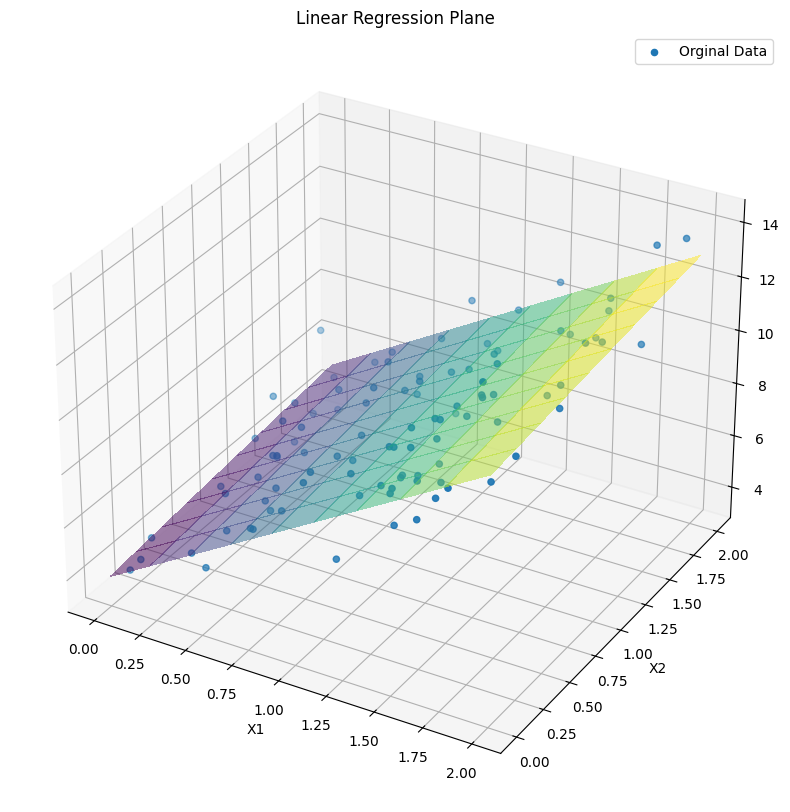

In [113]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

# Generate synthetic data
np.random.seed(67)   # change the seed to be the last two digits of your SB ID.
X = 2 * np.random.rand(100, 2)  # Generate 100 random 2D data points
y = 4 + 4 * X[:, 0] + 0.5 * X[:, 1] + np.random.randn(100)  # Generate y values with noise

# Add a column of ones to X for the bias terms (intercept) in the normal equation
X_b = np.c_[X, np.ones((len(X), 1))]

# Find theta using the normal equation
theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

# Print the intercept and coefficients of the regression plane
w1 = theta[0]
w2 = theta[1]
b = theta[2]
print('The coefficents are w1= ', w1, ' and w2= ', w2)
print('The intercept is b= ', b)

# Plot the generated data and the regression plane
fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')
ax.set_title('Linear Regression Plane')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
ax.scatter(X[:,0], X[:,1], y, label='Orginal Data') #scatter plot of orginal data
ax.legend()

X1, X2 = np.meshgrid(np.linspace(0, 2, 10, endpoint=True), np.linspace(0, 2, 10, endpoint=True)) #create mesh of data points spanning axes
Y = w1 * X1 + w2 * X2 + b #function for regression plane
surf = ax.plot_surface(X1, X2, Y, cmap = plt.cm.viridis, alpha=0.5, linewidth=0, antialiased=False) #plot the surface of Y using mesh grid as data points
plt.show()



## 4. Logistic Regression with Numpy and Graphing with Matplotlib (20 pts)

In class, we implemented a logistic regression model to perform binary classification. Here, I provided the exact same code that we discussed in class, but the values for learning_rate and num_epochs are modified. I also removed all the comments. You task is to
1. Tune the Learning Rate and Number of Epochs: Your first task is to fine-tune the values for the learning_rate and num_epochs parameters. Your goal is to identify suitable values that will enable us to converge to a set of parameter values $\theta$ closely approximating the optimal parameter values $\theta^*$.
2. Code Explanation: To enhance code comprehension, please augment the code with meaningful comments. These comments should elucidate the purpose and functionality of each code segment, making it easier for readers to understand the logistic regression implementation.

By accomplishing these tasks, we aim to achieve a better understanding of the logistic regression model's behavior and its parameter optimization process.

In [48]:
import numpy as np
import matplotlib.pyplot as plt

#Function that computes the sigmoid of z. This is the type of line our regression model will fit to to perform binary classifications
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


np.random.seed(595)
X = np.random.rand(2, 100) #create a 2x100 vector of random data from [0,1)
w_true = np.array([1.5, -2.5]) #vector defining the weights for the input data
b_true = 1.0  # True bias
probabilities = sigmoid(np.dot(w_true.T, X) + b_true) #computes the vectorized form of the logistic regression hypothesis function
Y = (probabilities > 0.5).astype(int) #for each probability, stores it's value as 1 is it's greater than 50%
X = X + 0.3 * np.random.rand(2, 100) - 0.1 * np.random.rand(2, 100) #add random noise to X 

#create training and testing sets
X_train, X_test = X[:,:80], X[:,80:]
Y_train, Y_test = Y[:80], Y[80:]

#initialize weight and bias as 0 which will be updated in learning phase
w = np.zeros(X.shape[0])
b = 0.0
learning_rate = .2 #specify learning rate, which is essientially used as the step size when minimizing the cost function
num_epochs = 600 #specfify num_epochs, which will determine how many iterations the algorithm goes through in the training phase

#Logistic Regression/Machine Learning Algorithm
for epoch in range(num_epochs): #iterate the amount of times specficied by num_epochs
    A_train = sigmoid(np.dot(w.T, X_train) + b) #compute a new sigmoid function using newest iterations value of weight and bias

    #perform backward propagation to find gradients of w and b
    dJdw = np.dot(X_train, (A_train - Y_train).T) / len(Y_train) #partial derivative of cost function wrt w, taken as mean over all training examples
    dJdb = np.mean(A_train - Y_train) #partial derivative of cost function wrt b, taken as mean difference

    #gradient descent optimization algorithm then used to find new weights and bias
    w -= learning_rate * dJdw 
    b -= learning_rate * dJdb

#using computed weights and bias, finds sigmoid with training data, creating binary probablity list
A_train = sigmoid(np.dot(w.T, X_train) + b) 
predictions_train = (A_train > 0.5).astype(int)

#using computed weights and bias, finds sigmoid with testing data, creating binary probablity list
A_test = sigmoid(np.dot(w.T, X_test) + b)
predictions_test = (A_test > 0.5).astype(int)

#finds accuracy of the model against the training set and the testing set
train_accuracy = np.mean(predictions_train == Y_train)
test_accuracy = np.mean(predictions_test == Y_test)

print(f"Training Set Accuracy: {train_accuracy:.2f}")
print(f"Test Set Accuracy: {test_accuracy:.2f}")

Training Set Accuracy: 0.88
Test Set Accuracy: 1.00


I found either Training Accuracy= 0.88 and Test Accuracy=1.00, or Training Accuracy=0.90 and Test Accuracy=0.95 to be the best i could get

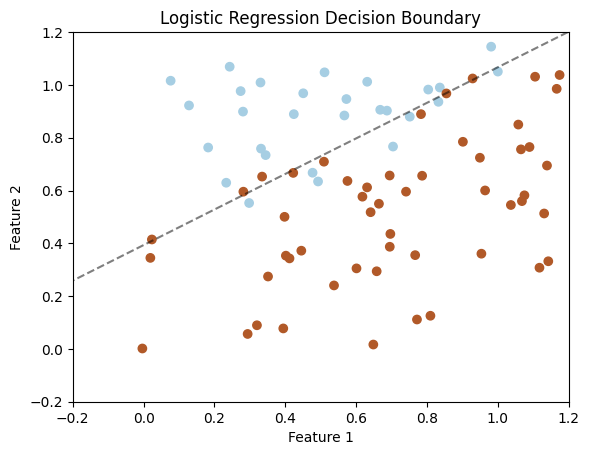

In [33]:
plt.scatter(X[0, :80], X[1,:80], c=Y[:80], cmap=plt.cm.Paired)
plt.xlim(-0.2, 1.2)
plt.ylim(-0.2, 1.2)
ax = plt.gca()

xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50), np.linspace(ylim[0], ylim[1], 50)) #creates a meshgrid that covers the surface of the below plot
Z = np.dot(w.T, np.c_[xx.ravel(), yy.ravel()].T) + b #compute the logistic regression of this grid based on the computed w and b
Z = sigmoid(Z) #find the sigmoid of this regression
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, colors='k', levels=[0.5], alpha=0.5, linestyles=['--'])#make a contour line for this sigmoid showing the decesion boundary

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Logistic Regression Decision Boundary')
plt.show()

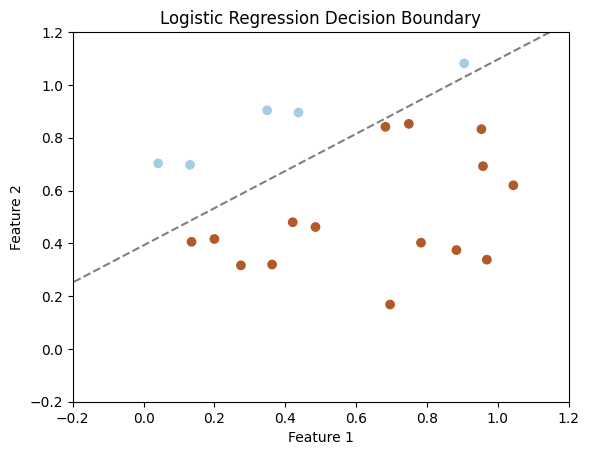

In [24]:
#Performs the same calculations and displays as above but for the test set of data
plt.scatter(X[0, 80:], X[1, 80:], c=Y[80:], cmap=plt.cm.Paired)
plt.xlim(-0.2, 1.2)
plt.ylim(-0.2, 1.2)

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50), np.linspace(ylim[0], ylim[1], 50))
Z = np.dot(w.T, np.c_[xx.ravel(), yy.ravel()].T) + b
Z = sigmoid(Z)
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, colors='k', levels=[0.5], alpha=0.5, linestyles=['--'])

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Logistic Regression Decision Boundary')
plt.show()

## 5. Image Binary Classification (30 pts)



For Question 5 of the Python project, please complete it using two distinct Jupyter Notebook scripts. This entails using one notebook for the original dataset and another for the modified dataset. Consequently, you will be submitting a total of three .ipynb files as part of your Python project, ensuring clear separation and organization of your work.

Your tasks:
1. Your first task is to re-implement the classification model that was covered in our class. Please start from scratch and write the code independently. You can refer to the original code provided on Brightspace if you encounter any difficulties, but try to write the code on your own to reinforce your understanding.

2. After implementing the classification model, **report the indices of all the images in the test set for which the model's predictions are incorrect.** To maintain consistency with Python’s convention, please begin your indexing with 0. Additionally, **display the images of 4 of these failed cases for visual examination (you can display more if you like)**. This analysis might help us identify instances where the model is struggling in some applications.

3. Now you will modify the code to treat the dataset differently. The first 160 images plus the last digit of your Student ID will constitute the new training set, while the remaining images in the original training set will be your new test set. There are 209 images in the original training set. For example, if your ID ends with 0, the first 160 images will form your training set, and the remaining 49 images will be part of your test set. The test dataset is discarded and no longer used. Re-train the model using this modified dataset and **report the training and test accuracies**. Additionally, **provide the indices of all the images in the test set for which the model's predictions are incorrect. Display 4 of these misclassified images for further examination.**

By completing these tasks, you'll gain valuable insights into the classification model's performance and its behavior under different training and testing conditions.


 Download datasets: [train](https://drive.google.com/file/d/1I1_zbX9aqvl7FaRW1qR36R4PCL7awBlH/view?usp=drive_link), [test](https://drive.google.com/file/d/1nDk_E5crLPsmLKwq8iykS8s26Xerf_X0/view?usp=drive_link)